<a href="https://colab.research.google.com/github/minhajahad/crimeHotspotDetection/blob/main/Project_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the necessary libraries

import pandas as pd
import sys
sys.path.append("../utils/")
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

import pandas as pd

import util_script as us

In [ ]:
'''Let's write code to automate the creating of our dataset'''

DATA_PATH = ""

file_names = ['crimes_2015.csv','crimes_2016.csv','crimes_2017.csv','crimes_2018.csv','crimes_2019.csv']
file_names = [DATA_PATH+x for x in file_names]

main_df = us.create_df(file_names)
orig_shape = main_df.shape
print("The Number of Crimes: "+ str(main_df.shape[0]))
print("\nThe Columns: "+ str(main_df.shape[1]))

Finished Loading Chicago Crime Dataset File for the year 2015.
Finished loading Chicago Crime Dataset file for the year 2016.


/content/util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2017.


/content/util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2018.


/content/util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2019.
All data files loaded onto the Main Dataframe.


The Number of Crimes: 1146382

The Columns: 22


/content/util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


In [ ]:
# Information about the main dataframe
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146382 entries, 0 to 1146381
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1146382 non-null  int64  
 1   Case Number           1146382 non-null  object 
 2   Date                  1146382 non-null  object 
 3   Block                 1146382 non-null  object 
 4   IUCR                  1146382 non-null  object 
 5   Primary Type          1146382 non-null  object 
 6   Description           1146382 non-null  object 
 7   Location Description  1142740 non-null  object 
 8   Arrest                1146382 non-null  bool   
 9   Domestic              1146382 non-null  bool   
 10  Beat                  1146382 non-null  int64  
 11  District              1146381 non-null  float64
 12  Ward                  1146373 non-null  float64
 13  Community Area        1146380 non-null  float64
 14  FBI Code              1146382 non-

<Axes: >

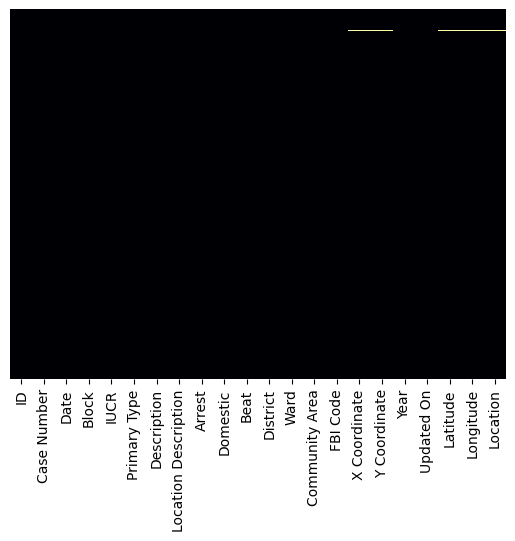

In [ ]:
# Visualizing Missing Values
sns.heatmap(data = main_df.isna(), yticklabels=False, cbar=False, cmap='inferno')

In [ ]:
# To drop the rows with missing data
main_df = main_df.dropna()
main_df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [ ]:
# Inspecting the loss of data after such cleaning
print("Data Retained after Cleaning:",round(((main_df.shape[0]/orig_shape[0]) * 100),2),"%")

Data Retained after Cleaning: 98.55 %


In [ ]:
# First 10 rows (instances) of our dataset
main_df.head(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17.0,68.0,14,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)"
2,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,8.0,45.0,04B,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)"
3,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,50.0,2.0,06,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)"
4,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,44.0,6.0,08B,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)"
5,10365142,HZ100722,12/31/2015 11:45:00 PM,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
6,10365005,HZ100487,12/31/2015 11:45:00 PM,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,42.0,32.0,06,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)"
7,10366580,HZ102701,12/31/2015 11:45:00 PM,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,37.0,25.0,14,1142595.0,1910502.0,2015,02/10/2018 03:50:01 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)"
8,10364809,HZ100034,12/31/2015 11:42:00 PM,004XX E RANDOLPH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,42.0,32.0,26,1179325.0,1901333.0,2015,02/10/2018 03:50:01 PM,41.884547,-87.616947,"(41.884546689, -87.616947314)"
9,10364668,HY556628,12/31/2015 11:41:00 PM,048XX S JUSTINE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,True,...,20.0,61.0,26,1166823.0,1872564.0,2015,02/10/2018 03:50:01 PM,41.805879,-87.663680,"(41.805879049, -87.663679798)"
10,10364943,HZ100396,12/31/2015 11:30:00 PM,003XX W 25TH PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,11.0,34.0,14,1174442.0,1887387.0,2015,02/10/2018 03:50:01 PM,41.846388,-87.635295,"(41.846388365, -87.635294564)"


In [ ]:
# What are the features of our dataset?
print(main_df.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [ ]:
""" Function to Clean the 'Date' feature """

def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [ ]:
# Using apply() of pandas to apply time_convert on every row of the Date column
main_df['Date'] = main_df['Date'].apply(time_convert)

In [ ]:
# Inspect the cleaned "Date" column
main_df['Date'].head()

1   2015-12-31 23:59:00
2   2015-12-31 23:55:00
3   2015-12-31 23:50:00
4   2015-12-31 23:50:00
5   2015-12-31 23:45:00
Name: Date, dtype: datetime64[ns]

In [ ]:
""" Feature Engineering - Splitting the 'Date' feature into more suitable features for a Time-based analysis"""

# Feature Engineering 1 : Month
def month_col(x):
    return int(x.strftime("%m"))
main_df['Month'] = main_df['Date'].apply(month_col)

# Feature Engineering 2 : Day
def day_col(x):
    return int(x.strftime("%w"))
main_df['Day'] = main_df['Date'].apply(day_col)  

# Feature Engineering 3 : Hour
def hour_col(x):
    return int(x.strftime("%H"))
main_df['Hour'] = main_df['Date'].apply(hour_col)

In [ ]:
# Inspect the latest version of the dataset

main_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
1,10365064,HZ100370,2015-12-31 23:59:00,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1172605.0,1854931.0,2015,02/10/2018 03:50:01 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)",12,4,23
2,10364662,HZ100006,2015-12-31 23:55:00,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,1188223.0,1852840.0,2015,02/10/2018 03:50:01 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)",12,4,23
3,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",12,4,23
4,10364683,HZ100002,2015-12-31 23:50:00,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,1167786.0,1925033.0,2015,02/10/2018 03:50:01 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)",12,4,23
5,10365142,HZ100722,2015-12-31 23:45:00,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23


In [ ]:
""" Filter the Top 10 most occuring crimes in the city of Chicago """

"""
STEPS FOLLOWED WHILE DOING THIS :

1. Take in each crime and make a dataset of it
2. Append the sub datasets to each other
"""
top_10 = list(main_df['Primary Type'].value_counts().head(10).index)

def filter_top_10(df):
    df2=df[df['Primary Type']=='THEFT']
    for crime in top_10[1:]:
        temp=df[df['Primary Type']==crime]
        df2 = df2.append(temp, ignore_index=True)
    return df2
    
df2=filter_top_10(main_df) # the dataframe with all the data of only the top 10 crimes
df2.shape

<ipython-input-15-f5e3bcf56283>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp, ignore_index=True)


(1036588, 25)

In [ ]:
1036588/1146382 * 100

90.42256420634658

In [ ]:
df2.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,10364740,HZ100010,2015-12-31 23:50:00,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,1158878.0,1949369.0,2015,02/10/2018 03:50:01 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",12,4,23
1,10365142,HZ100722,2015-12-31 23:45:00,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23
2,10365005,HZ100487,2015-12-31 23:45:00,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1177683.0,1902638.0,2015,02/10/2018 03:50:01 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",12,4,23
3,10364834,HZ100276,2015-12-31 23:30:00,015XX S MORGAN ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,1170163.0,1892555.0,2015,01/07/2016 04:14:34 PM,41.860664,-87.650847,"(41.860664155, -87.650847428)",12,4,23
4,10365158,HZ100762,2015-12-31 23:30:00,035XX N SOUTHPORT AVE,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1166346.0,1923429.0,2015,02/10/2018 03:50:01 PM,41.945467,-87.663974,"(41.945466899, -87.663974392)",12,4,23


In [ ]:
# Inspecting a few relevant features

df2[['Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Location', 'X Coordinate', 'Y Coordinate']].head()

,Domestic,Beat,District,Ward,Community Area,FBI Code,Location,X Coordinate,Y Coordinate
0,False,2411,24.0,50.0,2.0,06,"(42.016804165, -87.690708662)",1158878.0,1949369.0
1,False,114,1.0,42.0,32.0,06,"(41.888165132, -87.622937212)",1177683.0,1902638.0
2,False,114,1.0,42.0,32.0,06,"(41.888165132, -87.622937212)",1177683.0,1902638.0
3,False,1232,12.0,25.0,28.0,06,"(41.860664155, -87.650847428)",1170163.0,1892555.0
4,False,1922,19.0,44.0,6.0,06,"(41.945466899, -87.663974392)",1166346.0,1923429.0


In [ ]:
""" Grouping """

# Creating our explicit dataset
cri5 = df2.groupby(['Month','Day','District','Hour'], as_index=False).agg({"Primary Type":"count"})
cri5 = cri5.sort_values(by=['District'], ascending=False)
cri5.head()

,Month,Day,District,Hour,Primary Type
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


In [ ]:
# Renaming our feature
cri6=cri5.rename(index=str, columns={"Primary Type":"Crime_Count"})
cri6.head()

,Month,Day,District,Hour,Crime_Count
16369,5,2,31.0,9,1
2113,1,3,31.0,10,1
12673,4,2,31.0,10,1
1584,1,2,31.0,16,1
1583,1,2,31.0,13,1


In [ ]:
cri6 = cri6[['Month','Day','District','Hour','Crime_Count']]
cri6.head()
print("The shape of our final dataset is:", cri6.shape)

The shape of our final dataset is: (44361, 5)


In [ ]:
# Viewing the maximum and minmum crime counts
print("Highest Crime Count at any district at any time point:", cri6["Crime_Count"].max())
print("Lowest Crime Count at any district at any time point:", cri6["Crime_Count"].min())

Highest Crime Count at any district at any time point: 93
Lowest Crime Count at any district at any time point: 1


In [ ]:
print("Average no. of crimes per district per time point :",round(cri6['Crime_Count'].sum()/cri6.shape[0], 2),".")

Average no. of crimes per district per time point : 23.37 .


In [ ]:
# Inspecting our own lower and upper bounds to make a target feature "Alarm"

lower = np.mean(cri6['Crime_Count'])-0.75*np.std(cri6['Crime_Count'])
higher = np.mean(cri6['Crime_Count'])+0.75*np.std(cri6['Crime_Count'])
print(lower, higher)

13.968552155047819 32.76565131196149


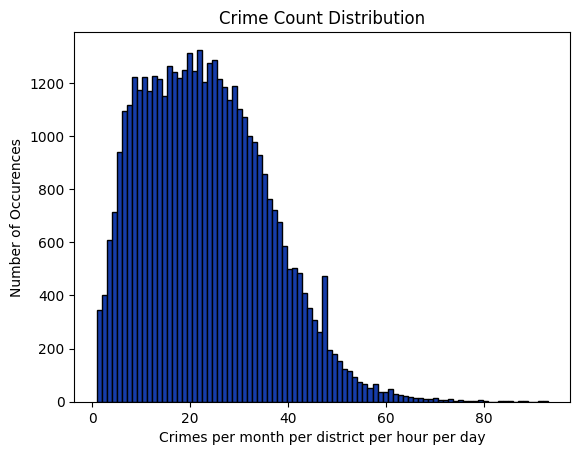

In [ ]:
# Crime Count Distribution plot (We need to be using this plot in order to devise our target feature, "Alarm")

plt.hist(x='Crime_Count', data=cri6,bins=90,linewidth=1,edgecolor='black', color='#163ca9')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
plt.savefig("Distribution of crimes.png")

In [ ]:
# 0-14 : Low Crime Rate
# 15-33 : Medium Crime Rate
# 34 and above : High Crime Rate

### The above ranges can be made better with the help of a crime analyst. As of now, we have used an intuitive way
### of generating classifications for our target feature; based on aproximating the distribution of the crime counts
### as a Normal curve

# Feature Engineer the above dataset
def crime_rate_assign(x):
    if(x<=14):
        return 0
    elif(x>14 and x<=33):
        return 1
    else:
        return 2
cri6['Alarm'] = cri6['Crime_Count'].apply(crime_rate_assign)
cri6 = cri6[['Month','Day','Hour','District','Crime_Count','Alarm']]    
cri6.head()

,Month,Day,Hour,District,Crime_Count,Alarm
16369,5,2,9,31.0,1,0
2113,1,3,10,31.0,1,0
12673,4,2,10,31.0,1,0
1584,1,2,16,31.0,1,0
1583,1,2,13,31.0,1,0


In [ ]:
# To store the above dataset as a csv file
cri6.to_csv("Crime_Compress.csv")

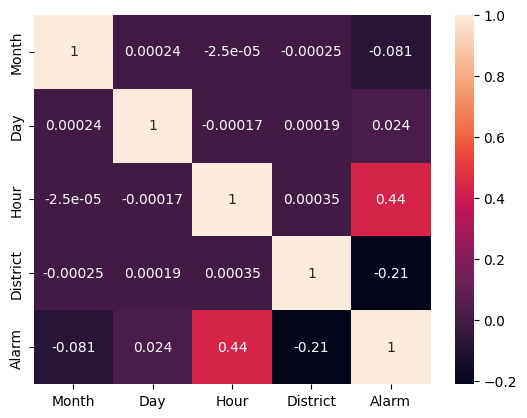

In [ ]:
# Correlation heatmap

temp = cri6[['Month', 'Day', 'Hour', 'District', 'Alarm']]
sns.heatmap(temp.corr(), annot=True)
#plt.title("Checking!", fontsize=17)
plt.savefig("Correlation.png")

In [ ]:
# Let's check how good our data is for classification
cri6['Alarm'].value_counts()

1    22640
0    12449
2     9272
Name: Alarm, dtype: int64

In [ ]:
print("Low Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[0]/cri6['Alarm'].value_counts().sum()*100,2))
print("Medium Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[1]/cri6['Alarm'].value_counts().sum()*100,2))
print("High Crime Rate Percentage:", round(cri6['Alarm'].value_counts()[2]/cri6['Alarm'].value_counts().sum()*100.2))

Low Crime Rate Percentage: 28.06
Medium Crime Rate Percentage: 51.04
High Crime Rate Percentage: 21


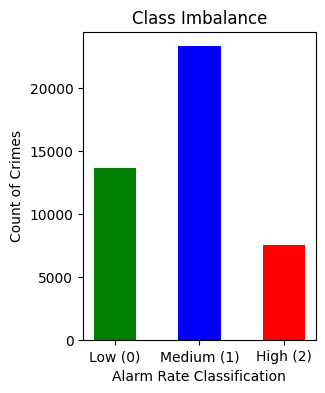

In [ ]:
# Plotting the Imbalance

x=['Low (0)','Medium (1)','High (2)']
y=[13600, 23273, 7488]
fig, ax = plt.subplots(figsize=(3, 4))
plt.bar(x,y, color=['green', 'blue', 'red'], width=0.5)
# plt.title('THE IMBALANCE IN THE DATASET')
plt.xlabel('Alarm Rate Classification')
plt.ylabel('Count of Crimes')
plt.title("Class Imbalance")
plt.savefig("imbalance.png")

In [ ]:
""" Building our completely unseen final test dataset for the 'GOD TEST 1' """

# Load the Dataset
test_files = ['crimes_2013.csv', 'crimes_2012.csv', 'crimes_2014.csv']
test_files = [DATA_PATH+x for x in test_files]
test_df = us.create_df(test_files)

# Drop missing values
test_df = test_df.dropna()

# Using apply() of pandas to apply time_convert on every row of the Date column
test_df['Date'] = test_df['Date'].apply(time_convert)

# Feature Engineering our columns
test_df['Month'] = test_df['Date'].apply(month_col)
test_df['Day'] = test_df['Date'].apply(day_col)
test_df['Hour'] = test_df['Date'].apply(hour_col)

# Compressing
df7 = filter_top_10(test_df)
cri7 = df7.groupby(["Month", "Day", "District", "Hour"], as_index=False).agg({"Primary Type" : "count"})
cri7 = cri7.sort_values(by=["District"], ascending=False)
cri8 = cri7.rename(index=str, columns={"Primary Type" : "Crime_Count"})
cri8 = cri8[["Month", "Day", "District", "Hour", "Crime_Count"]]
cri8['Alarm'] = cri8['Crime_Count'].apply(crime_rate_assign)
cri8 = cri8[['Month','Day','Hour','District','Crime_Count','Alarm']]    
print(cri8.head())
print("Class Imbalance\n")
print(cri8['Alarm'].value_counts())

Finished Loading Chicago Crime Dataset File for the year 2013.
Finished loading Chicago Crime Dataset file for the year 2012.


/content/util_script.py:26: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file)
/content/util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


Finished loading Chicago Crime Dataset file for the year 2014.


/content/util_script.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(df_temp, ignore_index=True)


All data files loaded onto the Main Dataframe.




<ipython-input-15-f5e3bcf56283>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp, ignore_index=True)


       Month  Day  Hour  District  Crime_Count  Alarm
35316     10    3    13      31.0            1      0
24243      7    3    10      31.0            1      0
28464      8    4     4      31.0            1      0
28465      8    4    20      31.0            1      0
25299      7    5    17      31.0            1      0
Class Imbalance

1    22259
0    17891
2     4100
Name: Alarm, dtype: int64


In [ ]:
'''Creating the Oversampled balanced dataset'''

from sklearn.utils import resample # for upsampling

# Set individual classes
cri6_low = cri6[cri6['Alarm']==0]
cri6_medium = cri6[cri6['Alarm']==1]
cri6_high = cri6[cri6['Alarm']==2]

# Upsample the minority classes to size of class 1 (medium)
cri6_low_upsampled = resample(cri6_low, 
                                 replace=True,     # sample with replacement
                                 n_samples=22640,    # to match majority class
                                 random_state=101) 

cri6_high_upsampled = resample(cri6_high, 
                                 replace=True,     # sample with replacement
                                 n_samples=22640,    # to match majority class
                                 random_state=101)

# Combine majority class with upsampled minority class
cri6_upsampled = pd.concat([cri6_medium, cri6_low_upsampled, cri6_high_upsampled])

In [ ]:
# Using Random Forest for classification (Imbalanced Dataset)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib

X = cri6.iloc[:,0:4].values
y = cri6.iloc[:,5].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 78.35181678838698 


----------Confusion Matrix------------------------------------
Predicted Alarm     0     1     2
Actual Alarm                     
0                2484   570     2
1                 525  4627   549
2                   0   755  1579

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      3056
           1       0.78      0.81      0.79      5701
           2       0.74      0.68      0.71      2334

    accuracy                           0.78     11091
   macro avg       0.78      0.77      0.77     11091
weighted avg       0.78      0.78      0.78     11091


UAR -> 0.7669867390092366


In [ ]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
